In [8]:
import pandas as pd
import jieba
import jieba.analyse
import numpy
from collections import Counter
import plotly.express as px
data1 = pd.read_csv('臺北市住宅竊盜點位資訊.csv', encoding='BIG5')
data1

,編號,案類,發生日期,發生時段,發生地點
0,1,住宅竊盜,1030623,08~10,臺北市中正區廈門街91~120號
1,2,住宅竊盜,1040101,00~02,臺北市文山區萬美里萬寧街1~30號
2,3,住宅竊盜,1040101,00~02,臺北市信義區富台里忠孝東路5段295巷6弄1~30號
3,4,住宅竊盜,1040101,06~08,臺北市中山區新生北路1段91~120號
4,5,住宅竊盜,1040101,10~12,臺北市文山區明興里興隆路4段1~30號
...,...,...,...,...,...
3550,3551,住宅竊盜,1120201,05~07,臺北市士林區福佳里中正路451~480號
3551,3552,住宅竊盜,1111231,17~19,臺北市士林區名山里至誠路2段92巷3弄1~30號
3552,3553,住宅竊盜,1120119,11~13,臺北市北投區開明里翠華街1~30號
3553,3554,住宅竊盜,1101028,08~10,臺北市中山區新生北路3段1~30號


In [9]:
data1['seg'] = ""
data1['segone'] = ""
data1.head()

,編號,案類,發生日期,發生時段,發生地點,seg,segone
0,1,住宅竊盜,1030623,08~10,臺北市中正區廈門街91~120號,,
1,2,住宅竊盜,1040101,00~02,臺北市文山區萬美里萬寧街1~30號,,
2,3,住宅竊盜,1040101,00~02,臺北市信義區富台里忠孝東路5段295巷6弄1~30號,,
3,4,住宅竊盜,1040101,06~08,臺北市中山區新生北路1段91~120號,,
4,5,住宅竊盜,1040101,10~12,臺北市文山區明興里興隆路4段1~30號,,


In [10]:
index = 0
for documents in data1['發生時段']:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    data1['seg'].iloc[index] = seg_list
    index += 1
data1["seg"]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.440 seconds.
Prefix dict has been built succesfully.
C:\Users\User\AppData\Local\Temp\ipykernel_1740\2993411320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['seg'].iloc[index] = seg_list


0       [08, 10]
1       [00, 02]
2       [00, 02]
3       [06, 08]
4       [10, 12]
          ...   
3550    [05, 07]
3551    [17, 19]
3552    [11, 13]
3553    [08, 10]
3554    [11, 13]
Name: seg, Length: 3555, dtype: object

In [11]:
words = list(data1["發生時段"])
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())
df = [show_key, show_values]
result = pd.concat(df, axis=1)
result.columns = ['time', 'freguency']
result

,time,freguency
0,08~10,340
1,00~02,272
2,06~08,191
3,10~12,338
4,12~14,338
5,04~06,156
6,16~18,246
7,18~20,314
8,20~22,324
9,02~04,237


In [12]:
timef = data1['發生時段']=="14~16"
timedata = data1[timef]
timedata

,編號,案類,發生日期,發生時段,發生地點,seg,segone
54,55,住宅竊盜,1040123,14~16,臺北市中山區北安路571~600號,"[14, 16]",
55,56,住宅竊盜,1040123,14~16,臺北市中正區龍光里和平西路2段1~30號,"[14, 16]",
66,67,住宅竊盜,1040127,14~16,臺北市南港區東明里興華路64巷1~30號,"[14, 16]",
69,70,住宅竊盜,1040128,14~16,臺北市內湖區東湖里康樂街48巷18~1號,"[14, 16]",
84,85,住宅竊盜,1040205,14~16,臺北市萬華區大理街170巷1~30號,"[14, 16]",
...,...,...,...,...,...,...,...
3499,3500,住宅竊盜,1111108,14~16,臺北市士林區重慶北路二段151~180號,"[14, 16]",
3503,3504,住宅竊盜,1110511,14~16,臺北市大安區龍坡里泰順街1~30號,"[14, 16]",
3506,3507,住宅竊盜,1111112,14~16,臺北市南港區重陽里重陽路125巷36弄1~30號,"[14, 16]",
3515,3516,住宅竊盜,1111221,14~16,臺北市中正區信義路二段1~30號,"[14, 16]",


In [13]:
index = 0
for documents in data1['發生地點']:
    seg_list1 = jieba.analyse.extract_tags(documents, 100)
    data1['segone'].iloc[index] = seg_list1
    index += 1

C:\Users\User\AppData\Local\Temp\ipykernel_1740\122108074.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['segone'].iloc[index] = seg_list1


In [14]:
data1['segone']

0            [北市, 區廈, 門街, 91, 120, 中正]
1              [北市, 區萬美里, 萬寧街, 30, 文山]
2       [北市, 信義區, 富台, 東路, 295, 30, 忠孝]
3              [北市, 新生北路, 91, 120, 中山]
4            [北市, 區明, 興里, 興隆路, 30, 文山]
                     ...              
3550     [北市, 區福佳里, 中正路, 451, 480, 士林]
3551          [北市, 誠路, 92, 30, 士林, 名山]
3552             [投區, 翠華街, 30, 明里, 市北]
3553                [北市, 新生北路, 30, 中山]
3554      [北市, 區陽, 31, 60, 明里, 士林, 山路]
Name: segone, Length: 3555, dtype: object

In [15]:
type(data1['segone'])

pandas.core.series.Series

In [16]:
placedata_seg_list = data1['segone'].tolist()
type(placedata_seg_list)

list

In [17]:
placedata_seg_list

[['北市', '區廈', '門街', '91', '120', '中正'],
 ['北市', '區萬美里', '萬寧街', '30', '文山'],
 ['北市', '信義區', '富台', '東路', '295', '30', '忠孝'],
 ['北市', '新生北路', '91', '120', '中山'],
 ['北市', '區明', '興里', '興隆路', '30', '文山'],
 ['北市', '鄰忠誠路', '130', '30', '天福', '士林'],
 ['北市', '萬華區', '159', '30', '大理'],
 ['北市', '萬華區', '159', '30', '大理'],
 ['吉林路', '北市', '121', '150', '中山'],
 ['北市', '信義區', '225', '32', '30', '永吉', '五常'],
 ['北市', '區明', '勝里', '31', '60', '通河', '士林'],
 ['北市', '東路', '181', '210', '中山', '南京'],
 ['北市', '萬華區', '159', '30', '大理'],
 ['北市', '萬華區', '159', '30', '大理'],
 ['投區', '吉慶里', '實踐', '56', '30', '市北'],
 ['北市', '區忠勤', '中華路', '311', '30', '中正'],
 ['北市', '區興福里', '12', '鄰景華街', '61', '90', '文山'],
 ['北市', '信義區', '雅祥里', '30', '基隆'],
 ['北市', '91', '120', '汀州', '中正', '水源'],
 ['北市', '區萬芳里', '萬芳路', '31', '60', '文山'],
 ['北市', '區萬美里', '萬美街', '61', '90', '文山'],
 ['北市', '湖區', '港華里', '港華街', '30'],
 ['北市', '區樂群', '91', '120', '二路', '中山'],
 ['北市', '區民權', '東路', '106', '30', '松山'],
 ['北市', '信義區', '福德街', '373', '91', '120'],


In [18]:
flat = [x for sublist in placedata_seg_list for x in sublist]
diction = Counter(flat)
diction.keys()

dict_keys(['北市', '區廈', '門街', '91', '120', '中正', '區萬美里', '萬寧街', '30', '文山', '信義區', '富台', '東路', '295', '忠孝', '新生北路', '中山', '區明', '興里', '興隆路', '鄰忠誠路', '130', '天福', '士林', '萬華區', '159', '大理', '吉林路', '121', '150', '225', '32', '永吉', '五常', '勝里', '31', '60', '通河', '181', '210', '南京', '投區', '吉慶里', '實踐', '56', '市北', '區忠勤', '中華路', '311', '區興福里', '12', '鄰景華街', '61', '90', '雅祥里', '基隆', '汀州', '水源', '區萬芳里', '萬芳路', '萬美街', '湖區', '港華里', '港華街', '區樂群', '二路', '區民權', '106', '松山', '福德街', '373', '387', '大路', '大安', '區龍雲里', '132', '區光', '22', '南路', '325', '18', '健康', '青年', '區富', '錦街', '572', '和平西路', '382', '河街', '區饒', '區舊', '莊街', '290', '南港', '區九如里', '研究院', '湖區民權', '296', '大道', '市民', '敦化南路', '國業里', '松德路', '25', '區明義里', '46', '區羅斯福路', '52', '242', '桂林', '西園', '320', '通化街', '19', '通化', '區蓬萊里', '50', '昌吉', '大同', '重陽路', '511', '540', '三重', '柳鄉', '379', '區百齡', '21', '東街', '中山北路', '53', '區揚雅里', '承德路', '區龍安里', '青田', '北安路', '571', '600', '區龍', '光里', '明路', '區萬興里', '鄰秀', '115', '梧州', '55', '民和', '酒泉街', '103', '里羅斯福路', '鄰

In [19]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

mask = np.array(Image.open("sunset.jpg"))
font = "C:\Windows\Fonts\MSJH.TTC"
wordcloud = WordCloud(background_color="white", font_path=font, mask=mask)
wordcloud.generate_from_frequencies(diction)

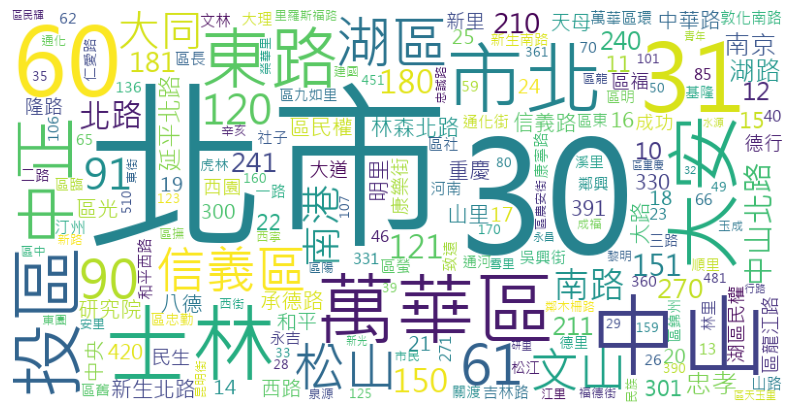

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()